In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SCVI/Historical/final_scvi_from_historical data_df_till_2023.csv')

In [ ]:
# Reverse the Realism column values
def reverse_realism(df, realism_column="FrequencyFactor"):
    df["FrequencyFactor"] = 5 - df[realism_column]
    return df

# Apply the function to your DataFrame
df = reverse_realism(df, realism_column="FrequencyFactor")

# Verify the transformation
print("Original Realism and Reversed Realism:")

Original Realism and Reversed Realism:


In [ ]:
# Reverse the Realism column values
def reverse_realism(df, realism_column="AwarenessKnowledgeFactor"):
    df["AwarenessKnowledgeFactor"] = 5 - df[realism_column]
    return df

# Apply the function to your DataFrame
df = reverse_realism(df, realism_column="AwarenessKnowledgeFactor")

# Verify the transformation
print("Original Realism and Reversed Realism:")

Original Realism and Reversed Realism:


In [ ]:
df.shape

(404, 157)

In [ ]:
df.head()

,author,title,score,created,selftext,url,cleantext,scam_success,scam_type,created_date,...,Consequence,ConsequenceFactor,Frequency,LogFrequency,FrequencyFactor,Realism,LogRealism,RealismFactor,ASI,SCVI
0,jonwong966,Walgreen's western union scam?,0,1.522570e+09,"Hey, I am asking about a transaction that soun...",https://www.reddit.com/r/Scams/comments/88mtwp...,hey asking transaction sounds kinda fishy some...,0.0,online shopping scam,2018-04-01 08:04:16,...,0.561942,0.818909,146,4.990433,4.918899,0.479452,0.391672,4.033630,3.219158,2.355360
1,ariaaria,Beware unknown phone numbers,4,1.522595e+09,I have been receiving calls from India (even t...,https://www.reddit.com/r/Scams/comments/88p3eo...,receiving calls india even though im canadian ...,0.0,tech support scam,2018-04-01 14:59:37,...,1.904020,2.774698,44,3.806662,3.303299,0.340909,0.293348,3.021041,2.919695,2.505898
2,Masternoob22,Got a strange text message pretty sure it's a ...,0,1.522603e+09,So at around midnight last night I got a stran...,https://www.reddit.com/r/Scams/comments/88pn74...,around midnight last night got strange text sa...,0.0,phishing,2018-04-01 17:14:11,...,0.995496,1.450721,155,5.049856,5.000000,0.251613,0.224433,2.311323,2.767000,1.907230
3,norwigga,Spam bomb and eBay purchase,3,1.522633e+09,"Hopefully this is the right place for this, it...",https://www.reddit.com/r/Scams/comments/88shhn...,hopefully right place really scam hack guess i...,0.0,online shopping scam,2018-04-02 01:33:10,...,1.451545,2.115313,146,4.990433,4.918899,0.479452,0.391672,4.033630,3.771332,2.619805
4,yungviet,Skype/Tinder Scam. What Should I do?,2,1.522641e+09,So I realized after that I have been stupidly ...,https://www.reddit.com/r/Scams/comments/88tfzw...,realized stupidly lured one skype webcam sex s...,1.0,romance scam,2018-04-02 03:44:35,...,1.921041,2.799503,24,3.218876,2.501093,0.625000,0.485508,5.000000,3.457014,2.874107


In [ ]:
import matplotlib.pyplot as plt

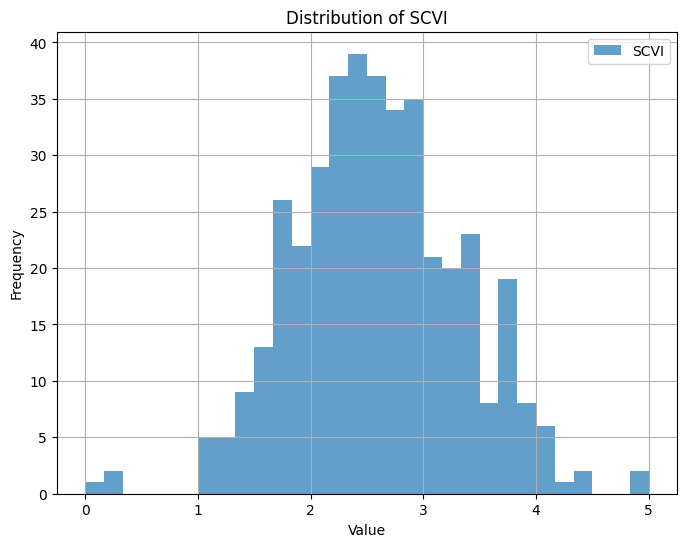

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['SCVI'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of SCVI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

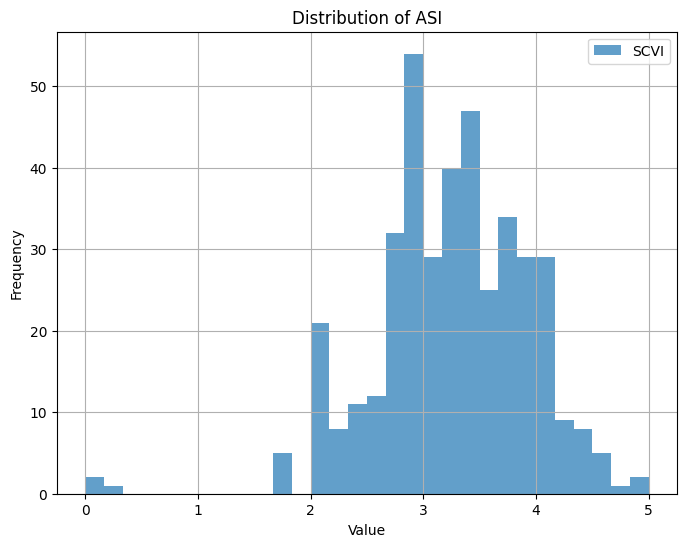

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['ASI'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of ASI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

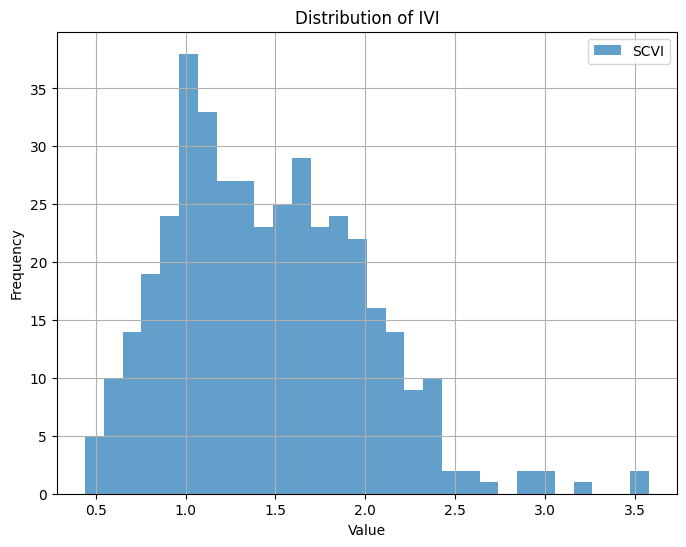

In [ ]:
# Plot histogram for SCVI
plt.figure(figsize=(8, 6))
plt.hist(df['IVIScore'], bins=30, alpha=0.7, label="SCVI")
plt.title("Distribution of IVI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fill missing values with zero for the IVI columns
ivi_columns = ["AwarenessKnowledgeFactor", "PreviousExperienceFactor", "BehavioralFactor", "PsychologicalFactor"]
df[ivi_columns] = df[ivi_columns].fillna(0)


In [ ]:
 #Fill missing values in the IVI columns with the mean of each column
df[ivi_columns] = df[ivi_columns].fillna(df[ivi_columns].mean())



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Columns: 157 entries, author to SCVI
dtypes: float64(137), int64(12), object(8)
memory usage: 495.7+ KB


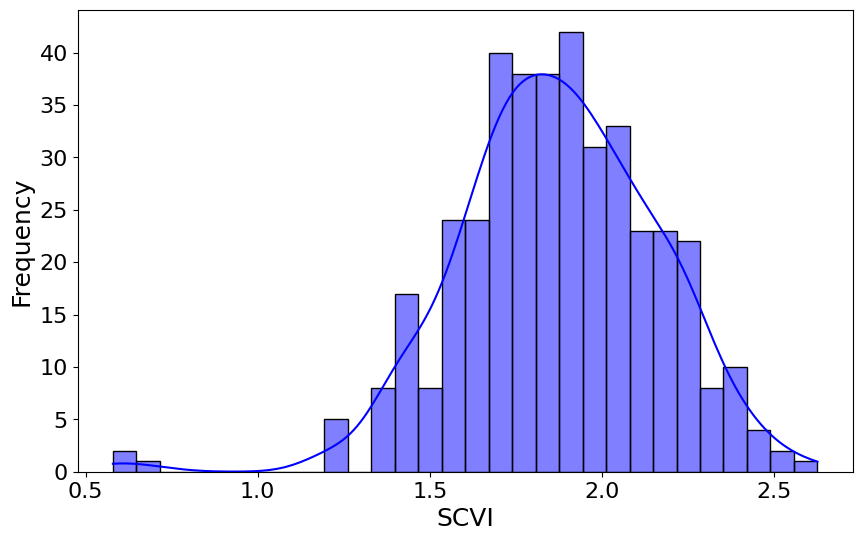

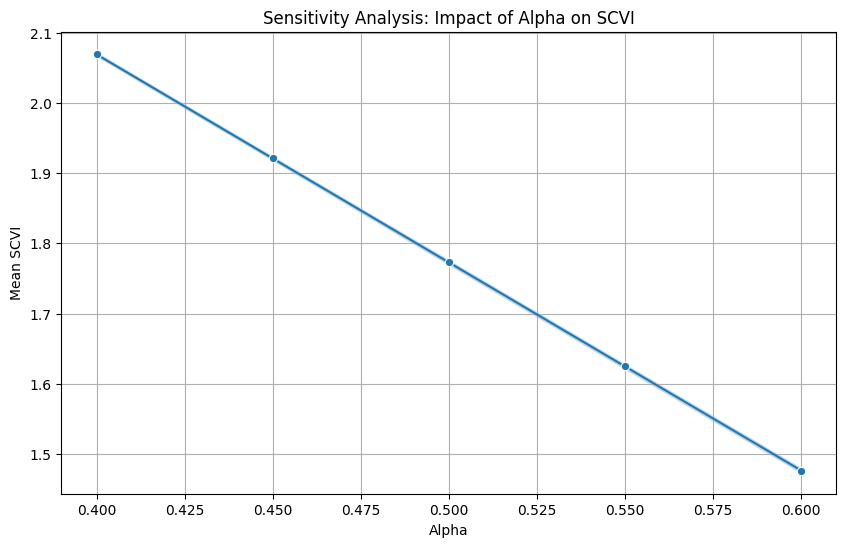

Cronbach's Alpha for IVI: -0.17174495218019664
Cronbach's Alpha for ASI: -0.4780144439929993


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Monte Carlo Simulation
def monte_carlo_simulation(df, num_simulations=10000):
    results = []
    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)
        beta = 1 - alpha

        # Random weights for IVI components
        w_A = np.random.uniform(0.1, 0.4)
        w_B = np.random.uniform(0.1, 0.4)
        w_P = np.random.uniform(0.1, 0.4)
        w_E = 1 - (w_A + w_B + w_P)

        # Compute IVI
        IVI = (
            w_A * df["AwarenessKnowledgeFactor"]
            + w_B * df["BehavioralFactor"]
            + w_P * df["PsychologicalFactor"]
            + w_E * df["PreviousExperienceFactor"]
        )

        # Compute ASI
        ASI = (
            df["FrequencyFactor"] * np.random.uniform(0.2, 0.5) +
            df["ConsequenceFactor"] * np.random.uniform(0.2, 0.5) +
            df["RealismFactor"] * np.random.uniform(0.2, 0.5)
        )

        # Compute SCVI
        SCVI = alpha * IVI + beta * ASI
        results.append(SCVI)

    # Convert results to DataFrame
    simulation_results = pd.DataFrame(results).T
    simulation_results.columns = [f"Sim_{i+1}" for i in range(num_simulations)]

    return simulation_results

# Sensitivity Analysis
def sensitivity_analysis(df):
    parameters = {
        "alpha": np.linspace(0.4, 0.6, 5),
        "w_A": np.linspace(0.1, 0.4, 5),
        "w_B": np.linspace(0.1, 0.4, 5),
        "w_P": np.linspace(0.1, 0.4, 5)
    }

    sensitivities = []
    for alpha in parameters["alpha"]:
        beta = 1 - alpha
        for w_A in parameters["w_A"]:
            for w_B in parameters["w_B"]:
                for w_P in parameters["w_P"]:
                    w_E = 1 - (w_A + w_B + w_P)
                    IVI = (
                        w_A * df["AwarenessKnowledgeFactor"]
                        + w_B * df["BehavioralFactor"]
                        + w_P * df["PsychologicalFactor"]
                        + w_E * df["PreviousExperienceFactor"]
                    )
                    ASI = df["ASI"]
                    SCVI = alpha * IVI + beta * ASI
                    sensitivities.append({
                        "alpha": alpha,
                        "w_A": w_A,
                        "w_B": w_B,
                        "w_P": w_P,
                        "mean_SCVI": SCVI.mean()
                    })

    return pd.DataFrame(sensitivities)

# Cronbach's Alpha Test
def cronbach_alpha(df, component_columns):
    data_values = df[component_columns].values
    item_variances = np.var(data_values, axis=0, ddof=1)
    total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
    num_items = data_values.shape[1]
    alpha = num_items / (num_items - 1) * (1 - np.sum(item_variances) / total_variance)
    return alpha

# Example DataFrame Initialization (Replace with actual data)
# Uncomment the next line and load your dataset
# df = pd.read_csv("path_to_your_dataset.csv")

# Run Monte Carlo Simulation
simulation_results = monte_carlo_simulation(df)
simulation_means = simulation_results.mean(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(simulation_means, kde=True, bins=30, color="blue")
#plt.title("Monte Carlo Simulation: Distribution of SCVI")
plt.xlabel("SCVI", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("Montecarlo_reddit")
plt.show()
# Run Sensitivity Analysis
sensitivity_results = sensitivity_analysis(df)

# Plot Sensitivity Analysis Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=sensitivity_results, x="alpha", y="mean_SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of Alpha on SCVI")
plt.xlabel("Alpha")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()

# Run Cronbach's Alpha Test
alpha_ivi = cronbach_alpha(df, ["AwarenessKnowledgeFactor", "BehavioralFactor", "PsychologicalFactor", "PreviousExperienceFactor"])
alpha_asi = cronbach_alpha(df, ["FrequencyFactor", "ConsequenceFactor", "RealismFactor"])

print(f"Cronbach's Alpha for IVI: {alpha_ivi}")
print(f"Cronbach's Alpha for ASI: {alpha_asi}")


In [ ]:
data_values = df[["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]].values
item_variances = np.var(data_values, axis=0, ddof=1)
total_variance = np.var(np.sum(data_values, axis=1), ddof=1)
num_items = data_values.shape[1]

print(f"Item Variances: {item_variances}")
print(f"Total Variance: {total_variance}")
print(f"Number of Items: {num_items}")


In [ ]:
def alpha_if_item_deleted(df, columns):
    results = {}
    for col in columns:
        subset = [c for c in columns if c != col]
        alpha = cronbach_alpha(df, subset)
        results[col] = alpha
    return results

ivi_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "E2_factor", "P1_factor", "P2_factor"]
deleted_alpha = alpha_if_item_deleted(df, ivi_columns)

# Display results
print("Cronbach's Alpha if Item Deleted:")
for col, alpha in deleted_alpha.items():
    print(f"{col}: {alpha}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[ivi_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for IVI Indicators")
plt.show()


In [ ]:
# Example: After identifying and removing an indicator
updated_ivi_columns = ["A1_factor", "A2_factor", "B1_factor", "E1_factor", "P1_factor", "P2_factor"]  # Example
alpha_ivi_updated = cronbach_alpha(df, updated_ivi_columns)
print(f"Cronbach's Alpha for Updated IVI: {alpha_ivi_updated}")


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[ivi_columns] = scaler.fit_transform(df[ivi_columns])
alpha_ivi_scaled = cronbach_alpha(df, ivi_columns)
print(f"Cronbach's Alpha for Scaled IVI: {alpha_ivi_scaled}")


In [ ]:
w_A = 0.2  # Lower weight for awareness (A2_factor)
w_B = 0.3  # Higher weight for behavior (B1_factor)
w_P = 0.3  # Higher weight for psychological factors (P2_factor)
w_E = 0.2  # Lower weight for experience (E2_factor)


In [ ]:
df["IVI"] = (
    w_A * df["A2_factor"] +
    w_B * df["B1_factor"] +
    w_P * (df["P1_factor"] + df["P2_factor"]) +
    w_E * df["E2_factor"]
)
alpha_final = cronbach_alpha(df, updated_ivi_columns)
print(f"Final Cronbach's Alpha for Adjusted IVI: {alpha_final}")


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the IVI columns
pca = PCA(n_components=2)  # Example: Reduce to 2 components
ivi_data = df[updated_ivi_columns].values
pca_result = pca.fit_transform(ivi_data)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Add PCA components to the dataframe
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# Recompute Cronbach's Alpha with PCA components
pca_columns = ["PCA1", "PCA2"]
alpha_pca = cronbach_alpha(df, pca_columns)
print(f"Cronbach's Alpha after PCA: {alpha_pca}")


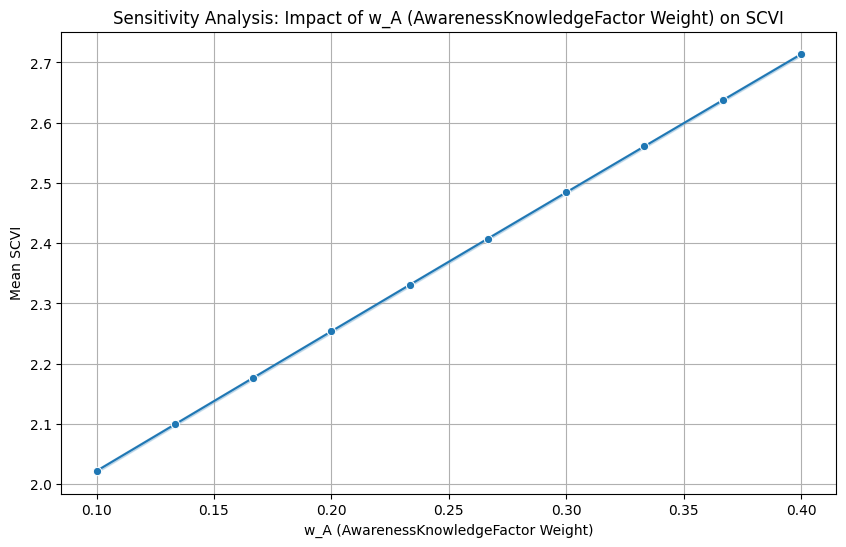

In [ ]:
def sensitivity_analysis_ivi_factors(df, alpha=0.5):
    weight_ranges = np.linspace(0.1, 0.4, 10)  # Generate 10 weight values between 0.1 and 0.4
    results = []

    # Iterate over weight ranges for each IVI factor
    for w_A in weight_ranges:  # AwarenessKnowledgeFactor
        for w_B in weight_ranges:  # BehavioralFactor
            for w_P in weight_ranges:  # PsychologicalFactor
                w_E = 1 - (w_A + w_B + w_P)  # PreviousExperienceFactor
                if w_E < 0:  # Skip invalid combinations where weights exceed 1
                    continue

                # Compute IVI using the updated column names
                IVI = (
                    w_A * df["AwarenessKnowledgeFactor"]
                    + w_B * df["BehavioralFactor"]
                    + w_P * df["PsychologicalFactor"]
                    + w_E * df["PreviousExperienceFactor"]
                )

                # Compute ASI (assumed to be precomputed in the DataFrame)
                ASI = df["ASI"]

                # Compute SCVI
                SCVI = alpha * IVI + (1 - alpha) * ASI

                # Store results
                results.append({
                    "w_A": w_A,
                    "w_B": w_B,
                    "w_P": w_P,
                    "w_E": w_E,
                    "Mean SCVI": SCVI.mean(),
                    "Std Dev SCVI": SCVI.std()
                })

    return pd.DataFrame(results)

# Perform sensitivity analysis for IVI factors
ivi_factor_sensitivity = sensitivity_analysis_ivi_factors(df)

# Visualize Sensitivity Analysis for IVI Factors (w_A example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_A", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_A (AwarenessKnowledgeFactor Weight) on SCVI")
plt.xlabel("w_A (AwarenessKnowledgeFactor Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


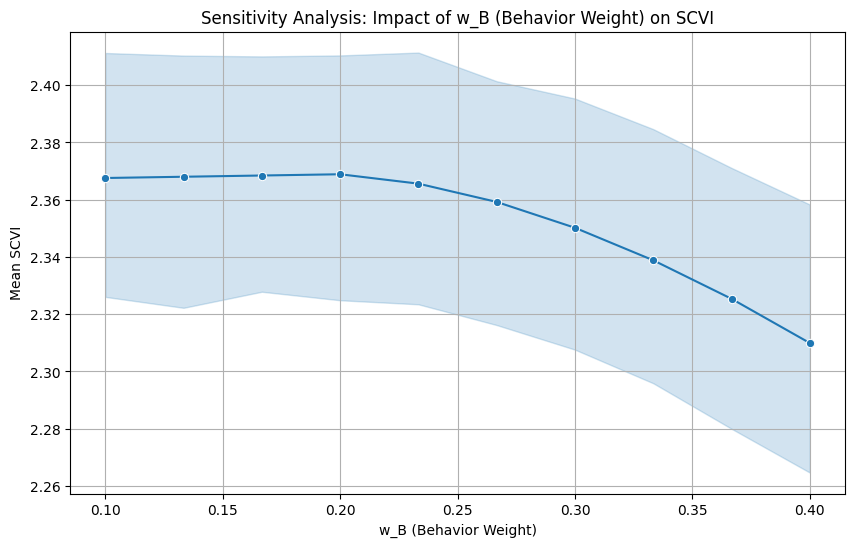

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_B example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_B", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_B (Behavior Weight) on SCVI")
plt.xlabel("w_B (Behavior Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


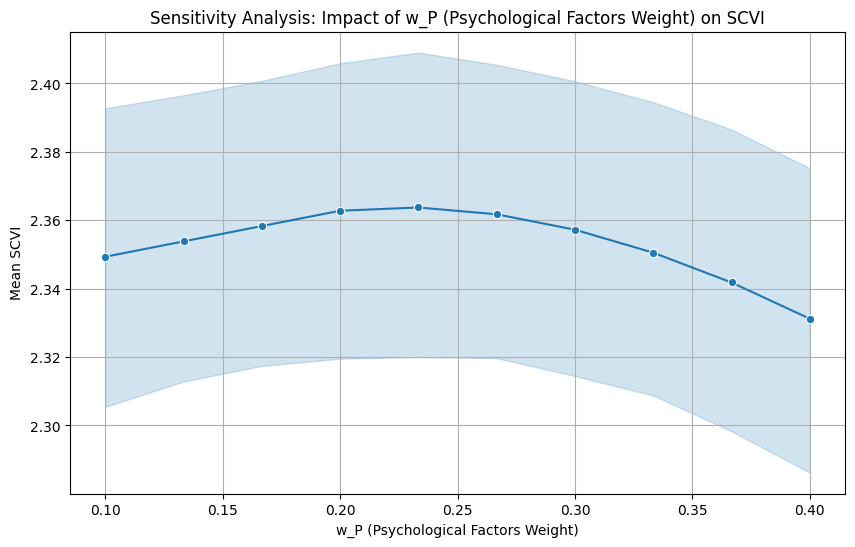

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_P example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_P", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_P (Psychological Factors Weight) on SCVI")
plt.xlabel("w_P (Psychological Factors Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


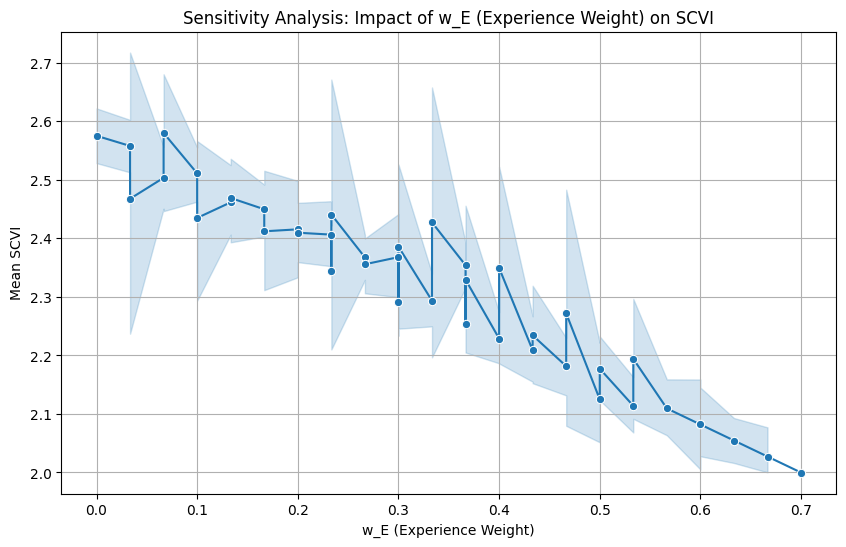

In [ ]:
# Visualize Sensitivity Analysis for IVI Factors (w_E example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=ivi_factor_sensitivity, x="w_E", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_E (Experience Weight) on SCVI")
plt.xlabel("w_E (Experience Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


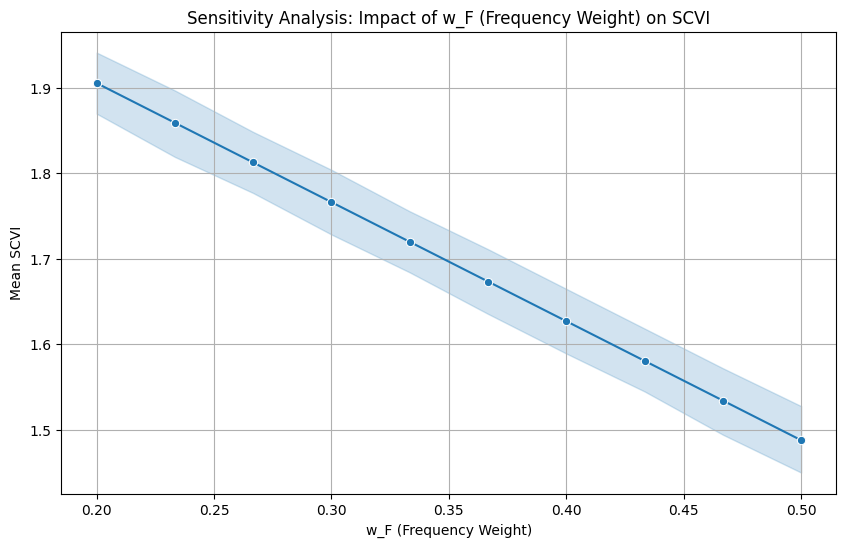

In [ ]:
def sensitivity_analysis_asi_factors(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.5, 10)
    results = []

    # Iterate over weight ranges for each factor
    for w_F in weight_ranges:
        for w_C in weight_ranges:
            w_R = 1 - (w_F + w_C)
            if w_R < 0:  # Skip invalid combinations
                continue

            # Compute ASI
            ASI = (
                w_F * df["FrequencyFactor"] +
                w_C * df["ConsequenceFactor"] +
                w_R * df["RealismFactor"]
            )

            # Compute IVI
            IVI = df["IVIScore"]

            # Compute SCVI
            SCVI = alpha * IVI + (1 - alpha) * ASI

            results.append({
                "w_F": w_F,
                "w_C": w_C,
                "w_S": w_R,
                "Mean SCVI": SCVI.mean(),
                "Std Dev SCVI": SCVI.std()
            })

    return pd.DataFrame(results)

# Perform sensitivity analysis for ASI factors
asi_factor_sensitivity = sensitivity_analysis_asi_factors(df)

# Visualize Sensitivity Analysis for ASI Factors (w_F example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_F", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_F (Frequency Weight) on SCVI")
plt.xlabel("w_F (Frequency Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


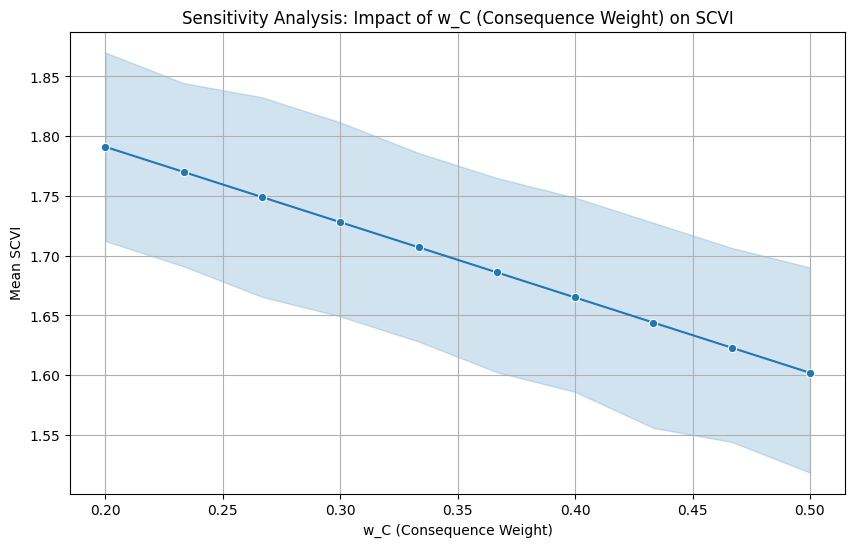

<ipython-input-11-6d4e969a2792>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=asi_factor_sensitivity, x="w_S", y="Mean SCVI", ci="sd", marker="o")


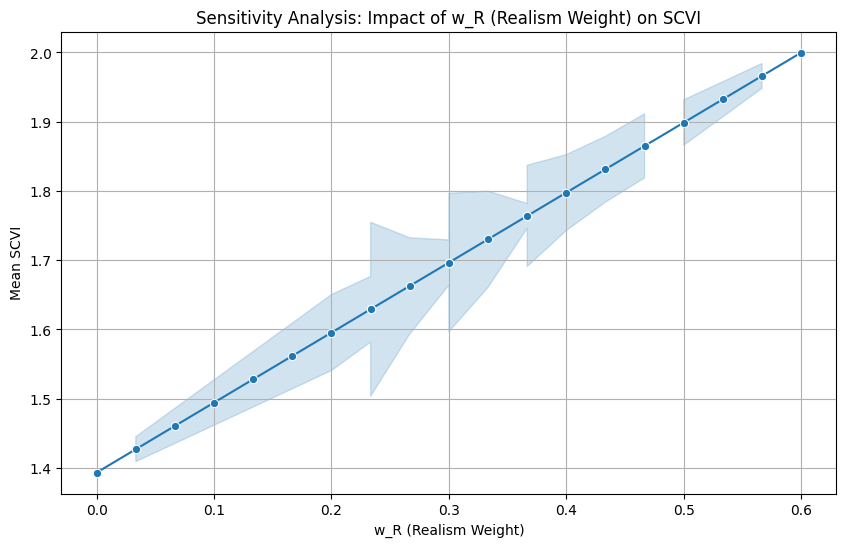

In [ ]:
# Visualize Sensitivity Analysis for ASI Factors (w_C example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_C", y="Mean SCVI", marker="o")
plt.title("Sensitivity Analysis: Impact of w_C (Consequence Weight) on SCVI")
plt.xlabel("w_C (Consequence Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()

# Visualize Sensitivity Analysis for ASI Factors (w_R example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity, x="w_S", y="Mean SCVI", ci="sd", marker="o")

plt.title("Sensitivity Analysis: Impact of w_R (Realism Weight) on SCVI")
plt.xlabel("w_R (Realism Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.show()


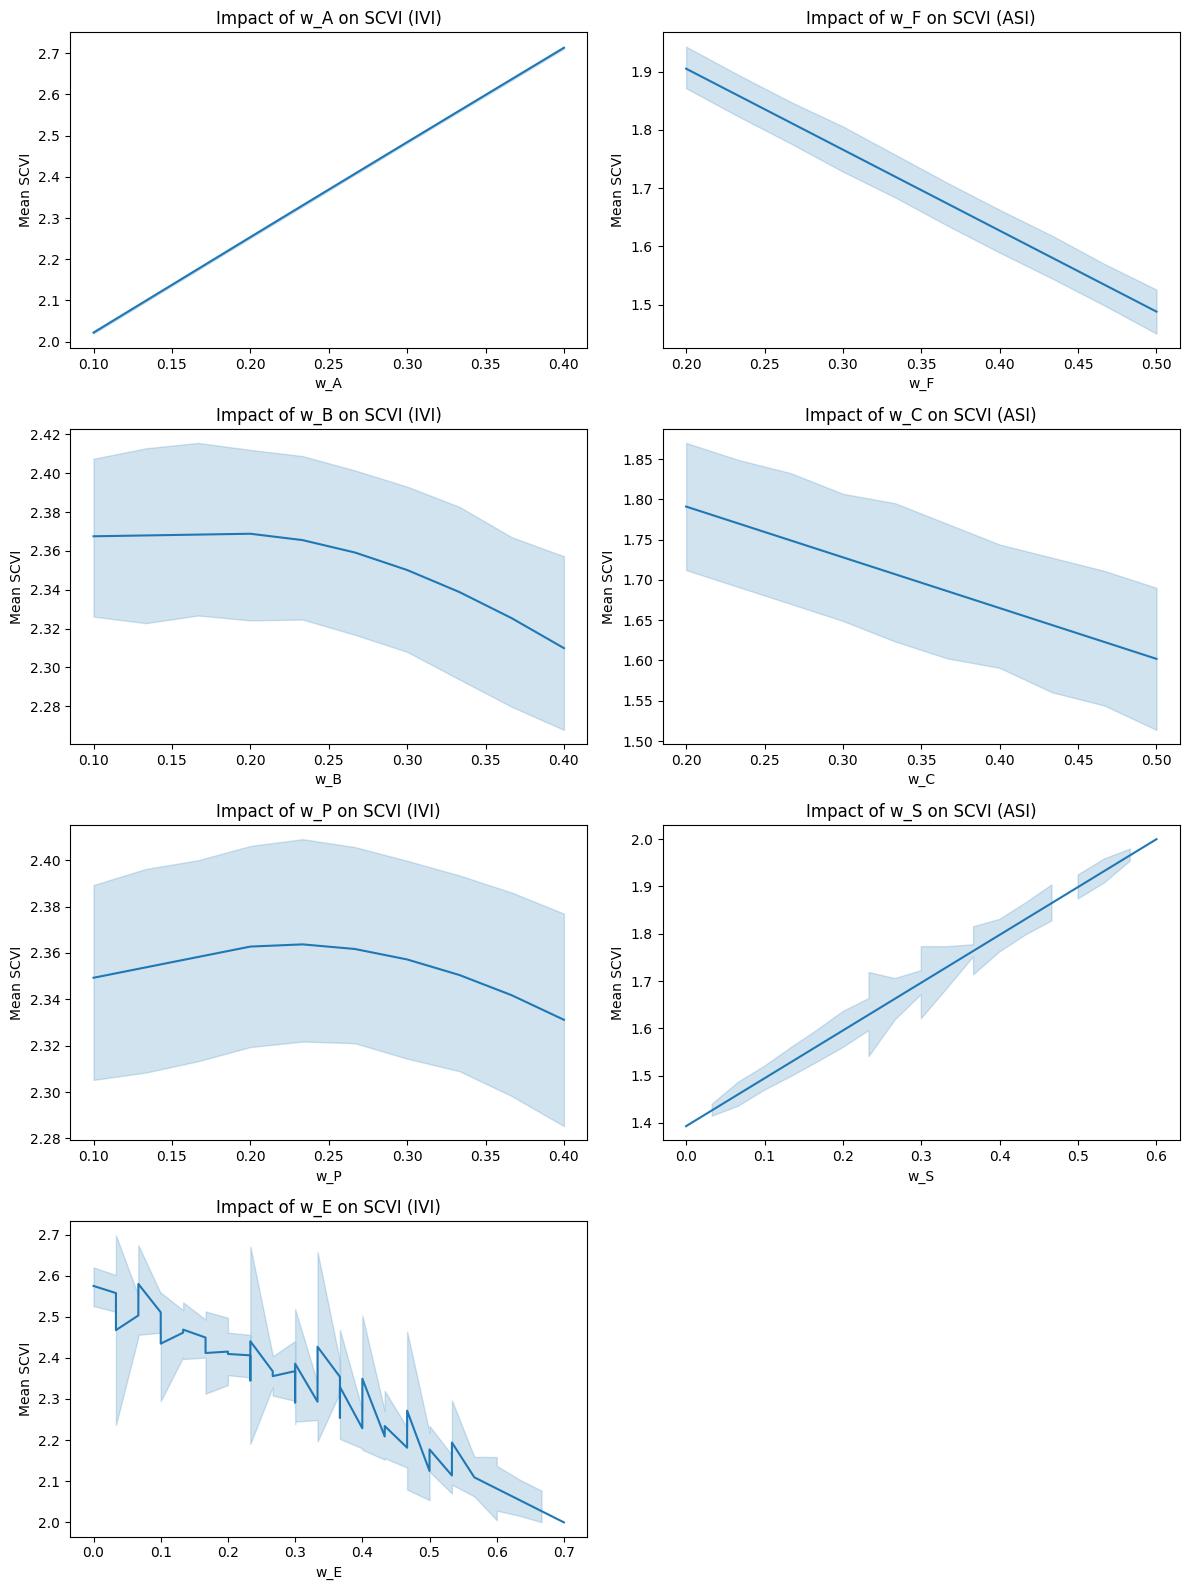

In [ ]:
# Re-import necessary libraries after reset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# IVI Factors: w_A, w_B, w_P, w_E
ivi_factors = ['w_A', 'w_B', 'w_P', 'w_E']
for i, factor in enumerate(ivi_factors):
    sns.lineplot(data=ivi_factor_sensitivity, x=factor, y='Mean SCVI', ax=axes[i, 0])
    axes[i, 0].set_title(f'Impact of {factor} on SCVI (IVI)')
    axes[i, 0].set_xlabel(f'{factor}')
    axes[i, 0].set_ylabel('Mean SCVI')

# ASI Factors: w_F, w_C, w_R
asi_factors = ['w_F', 'w_C', 'w_S']
for i, factor in enumerate(asi_factors):
    sns.lineplot(data=asi_factor_sensitivity, x=factor, y='Mean SCVI', ax=axes[i, 1])
    axes[i, 1].set_title(f'Impact of {factor} on SCVI (ASI)')
    axes[i, 1].set_xlabel(f'{factor}')
    axes[i, 1].set_ylabel('Mean SCVI')

# Adjusting unused subplot (if the number of IVI and ASI factors are not the same)
if len(ivi_factors) > len(asi_factors):
    fig.delaxes(axes[len(asi_factors), 1])  # This deletes the last ASI subplot if there are fewer ASI factors

plt.tight_layout()
plt.savefig("Reddit_sensitivity.jpeg")
plt.show()


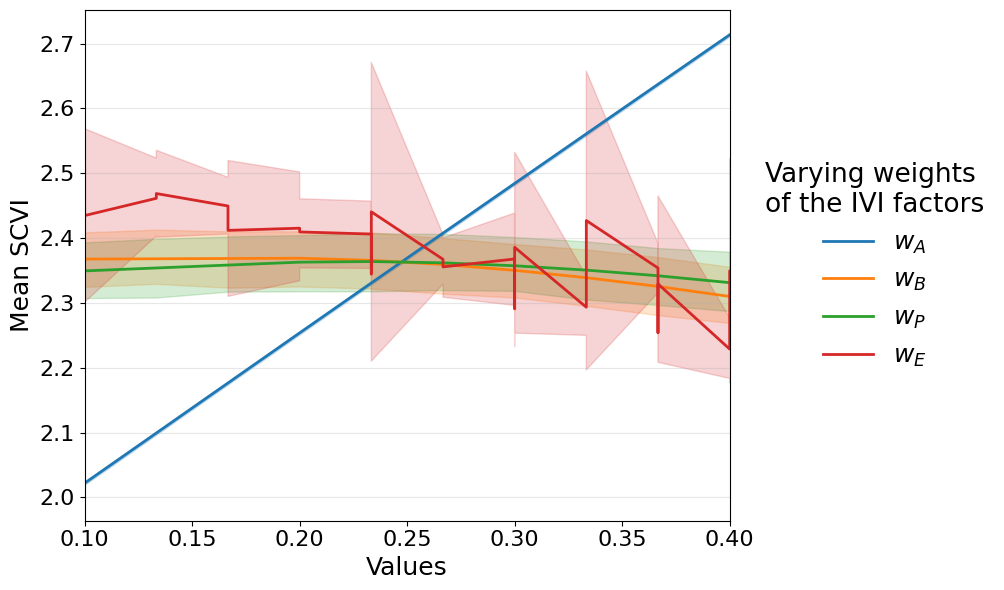

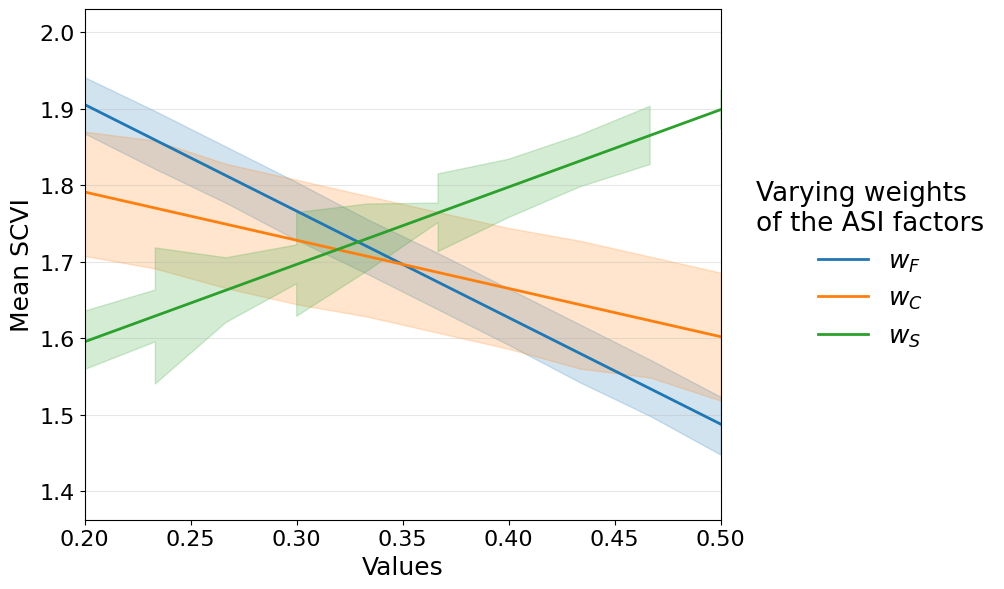

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data (replace with your actual data)
# Assuming `ivi_factor_sensitivity` and `asi_factor_sensitivity` are available as DataFrames
# with columns for the factors (`w_A`, `w_B`, etc.) and the `Mean SCVI` values.

# Combine IVI factors in one plot
plt.figure(figsize=(12, 6))
ivi_factors = ['w_A', 'w_B', 'w_P', 'w_E']
for factor in ivi_factors:
    # Format factor for LaTeX
    label = r'$w_{' + factor.split('_')[1] + r'}$'
    sns.lineplot(data=ivi_factor_sensitivity, x=factor, y='Mean SCVI', label=label, linewidth=2)

# Format IVI plot
plt.xlabel('Values', fontsize=18)
plt.ylabel('Mean SCVI', fontsize=18)
plt.xlim(0.1, 0.4) if 'w_E' in ivi_factors else None
plt.tick_params(axis='both', which='major', labelsize=16)

# Legend outside the plot
plt.legend(
    title="Varying weights\nof the IVI factors",
    fontsize=18,
    title_fontsize=19,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # Position legend outside the plot to the right
    frameon=False
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.savefig("Reddit_ivi_factors.jpeg", bbox_inches='tight')
plt.show()

# Combine ASI factors in one plot
plt.figure(figsize=(12, 6))
asi_factors = ['w_F', 'w_C', 'w_S']
for factor in asi_factors:
    # Format factor for LaTeX
    label = r'$w_{' + factor.split('_')[1] + r'}$'
    sns.lineplot(data=asi_factor_sensitivity, x=factor, y='Mean SCVI', label=label, linewidth=2)

# Format ASI plot
plt.xlabel('Values', fontsize=18)
plt.ylabel('Mean SCVI', fontsize=18)
plt.xlim(0.20, 0.50) if 'w_S' in asi_factors else None
plt.tick_params(axis='both', which='major', labelsize=16)

# Legend outside the plot
plt.legend(
    title="Varying weights\nof the ASI factors",
    fontsize=18,
    title_fontsize=19,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # Position legend outside the plot to the right
    frameon=False
)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.savefig("Reddit_asi_factors.jpeg", bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def sensitivity_analysis_asi_factor_wC(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.8, 10)  # Adjust the range for w_C
    results = []

    # Fix w_F and adjust w_R dynamically based on w_C
    w_F = 0.3  # Fixed value for frequency
    for w_C in weight_ranges:
        w_R = 1 - (w_F + w_C)
        if w_R < 0:  # Skip invalid combinations
            continue

        # Compute ASI
        ASI = (
            w_F * df["Frequency"] +
            w_C * df["Consequence"] +
            w_R * df["Realism"]
        )

        # Compute IVI
        IVI = df["IVI"]

        # Compute SCVI
        SCVI = alpha * IVI + (1 - alpha) * ASI

        results.append({
            "w_C": w_C,
            "w_R": w_R,
            "Mean SCVI": SCVI.mean(),
            "Std Dev SCVI": SCVI.std()
        })

    return pd.DataFrame(results)

# Perform sensitivity analysis for w_C
asi_factor_sensitivity_wC = sensitivity_analysis_asi_factor_wC(df)

# Visualize Sensitivity Analysis for w_C
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity_wC, x="w_C", y="Mean SCVI", marker="o")
plt.fill_between(asi_factor_sensitivity_wC["w_C"],
                 asi_factor_sensitivity_wC["Mean SCVI"] - asi_factor_sensitivity_wC["Std Dev SCVI"],
                 asi_factor_sensitivity_wC["Mean SCVI"] + asi_factor_sensitivity_wC["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of w_C (Consequence Weight) on SCVI")
plt.xlabel("w_C (Consequence Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.legend()
plt.show()


In [ ]:
def sensitivity_analysis_asi_factor_wR(df, alpha=0.5):
    weight_ranges = np.linspace(0.2, 0.8, 10)  # Adjust the range for w_R
    results = []

    # Fix w_F and w_C, adjust w_R dynamically
    w_F = 0.3  # Fixed value for frequency
    w_C = 0.4  # Fixed value for consequence
    for w_R in weight_ranges:
        if w_F + w_C + w_R > 1:  # Ensure weights sum to 1
            continue

        # Compute ASI
        ASI = (
            w_F * df["Frequency"] +
            w_C * df["Consequence"] +
            w_R * df["Realism"]
        )

        # Compute IVI
        IVI = df["IVI"]

        # Compute SCVI
        SCVI = alpha * IVI + (1 - alpha) * ASI

        results.append({
            "w_R": w_R,
            "Mean SCVI": SCVI.mean(),
            "Std Dev SCVI": SCVI.std()
        })

    return pd.DataFrame(results)

# Perform sensitivity analysis for w_R
asi_factor_sensitivity_wR = sensitivity_analysis_asi_factor_wR(df)

# Visualize Sensitivity Analysis for w_R
plt.figure(figsize=(10, 6))
sns.lineplot(data=asi_factor_sensitivity_wR, x="w_R", y="Mean SCVI", marker="o")
plt.fill_between(asi_factor_sensitivity_wR["w_R"],
                 asi_factor_sensitivity_wR["Mean SCVI"] - asi_factor_sensitivity_wR["Std Dev SCVI"],
                 asi_factor_sensitivity_wR["Mean SCVI"] + asi_factor_sensitivity_wR["Std Dev SCVI"],
                 alpha=0.2, label="Std Dev")
plt.title("Sensitivity Analysis: Impact of w_R (Realism Weight) on SCVI")
plt.xlabel("w_R (Realism Weight)")
plt.ylabel("Mean SCVI")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Monte Carlo Simulation
def monte_carlo_simulation(df, num_simulations=10000):
    results = []
    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)
        beta = 1 - alpha

        # Random weights for IVI components
        w_A = np.random.uniform(0.1, 0.4)  # AwarenessKnowledgeFactor
        w_B = np.random.uniform(0.1, 0.4)  # BehavioralFactor
        w_P = np.random.uniform(0.1, 0.4)  # PsychologicalFactor
        w_E = 1 - (w_A + w_B + w_P)  # PreviousExperienceFactor

        # Compute IVI using the renamed factors
        IVI = (
            w_A * df["AwarenessKnowledgeFactor"]
            + w_B * df["BehavioralFactor"]
            + w_P * df["PsychologicalFactor"]
            + w_E * df["PreviousExperienceFactor"]
        )

        # Compute ASI
        ASI = (
            df["FrequencyFactor"] * np.random.uniform(0.2, 0.5) +
            df["ConsequenceFactor"] * np.random.uniform(0.2, 0.5) +
            df["RealismFactor"] * np.random.uniform(0.2, 0.5)
        )

        # Compute SCVI and clip values between 0 and 5
        SCVI = alpha * IVI + beta * ASI
        SCVI = np.clip(SCVI, 0, 5)
        results.append(SCVI)

    # Convert results to DataFrame
    simulation_results = pd.DataFrame(results).T
    simulation_results.columns = [f"Sim_{i+1}" for i in range(num_simulations)]

    return simulation_results


In [ ]:
# Load your data
# df = pd.read_csv("path_to_data.csv")

# Run Monte Carlo Simulation
simulation_results = monte_carlo_simulation(df)

# Check the results
print(simulation_results.head())


In [ ]:
# Run Monte Carlo Simulation
simulation_results = monte_carlo_simulation(df)
simulation_means = simulation_results.mean(axis=1)

# Plot Monte Carlo Results
plt.figure(figsize=(10, 6))
sns.histplot(simulation_means, kde=True, bins=30, color="blue")
plt.title("Monte Carlo Simulation: Distribution of SCVI")
plt.xlabel("SCVI")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def identify_extreme_weights(df, num_simulations=10000):
    results = []

    for _ in range(num_simulations):
        # Randomly sample weights for IVI and ASI
        alpha = np.random.uniform(0.4, 0.6)  # Weight for IVI
        beta = 1 - alpha  # Weight for ASI

        w_A = np.random.uniform(0.1, 0.4)  # Awareness
        w_B = np.random.uniform(0.1, 0.4)  # Behavior
        w_P = np.random.uniform(0.1, 0.4)  # Psychological
        w_E = 1 - (w_A + w_B + w_P)  # Experience

        w_F = np.random.uniform(0.2, 0.5)  # Frequency
        w_C = np.random.uniform(0.2, 0.5)  # Consequence
        w_R = np.random.uniform(0.2, 0.5)  # Realism

        if w_E < 0 or w_F + w_C + w_R > 1:  # Skip invalid weights
            continue

        # Compute IVI
        IVI = (
            w_A * df["AwarenessKnowledgeFactor"]
            + w_B * df["BehavioralFactor"]
            + w_P * df["PsychologicalFactor"]
            + w_E * df["PreviousExperienceFactor"]
        )

        # Compute ASI
        ASI = (
            w_F * df["FrequencyFactor"]
            + w_C * df["ConsequenceFactor"]
            + w_R * df["RealismFactor"]
        )

        # Compute SCVI
        SCVI = alpha * IVI + beta * ASI
        SCVI = np.clip(SCVI, 0, 5)

        # Store results
        results.append({
            "SCVI": SCVI.mean(),
            "w_A": w_A, "w_B": w_B, "w_P": w_P, "w_E": w_E,
            "w_F": w_F, "w_C": w_C, "w_R": w_R,
            "alpha": alpha, "beta": beta
        })

    results_df = pd.DataFrame(results)

    # Identify extreme SCVI values
    low_SCVI = results_df.nsmallest(5, "SCVI")  # Top 5 lowest SCVI
    high_SCVI = results_df.nlargest(5, "SCVI")  # Top 5 highest SCVI

    return low_SCVI, high_SCVI

# Execute the function
low_SCVI, high_SCVI = identify_extreme_weights(df)

print("Top 5 Weight Combinations Leading to Lowest SCVI:")
print(low_SCVI)

print("\nTop 5 Weight Combinations Leading to Highest SCVI:")
print(high_SCVI)


In [ ]:
def analyze_factor_contribution(df, num_simulations=10000):
    results = []

    for _ in range(num_simulations):
        # Randomly sample weights
        alpha = np.random.uniform(0.4, 0.6)
        beta = 1 - alpha

        w_A = np.random.uniform(0.1, 0.4)
        w_B = np.random.uniform(0.1, 0.4)
        w_P = np.random.uniform(0.1, 0.4)
        w_E = 1 - (w_A + w_B + w_P)

        w_F = np.random.uniform(0.2, 0.5)
        w_C = np.random.uniform(0.2, 0.5)
        w_R = 1 - (w_F + w_C)

        if w_E < 0 or w_R < 0:
            continue

        # Compute IVI and ASI
        IVI = (
            w_A * df["AwarenessKnowledgeFactor"]
            + w_B * df["BehavioralFactor"]
            + w_P * df["PsychologicalFactor"]
            + w_E * df["PreviousExperienceFactor"]
        )
        ASI = (
            w_F * df["FrequencyFactor"]
            + w_C * df["ConsequenceFactor"]
            + w_R * df["RealismFactor"]
        )
        SCVI = alpha * IVI + beta * ASI

        results.append({
            "SCVI": SCVI.mean(),
            "Awareness": w_A, "Behavior": w_B, "Psychological": w_P, "Experience": w_E,
            "Frequency": w_F, "Consequence": w_C, "Realism": w_R
        })

    results_df = pd.DataFrame(results)

    # Compute correlation between weights and SCVI
    correlations = results_df.corr()["SCVI"].drop("SCVI")
    return correlations

# Execute the analysis
correlations = analyze_factor_contribution(df)

print("Correlations Between Weights and SCVI:")
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind="bar", color="skyblue")
plt.title("Contribution of IVI and ASI Factors to SCVI Variability")
plt.xlabel("Factors")
plt.ylabel("Correlation with SCVI")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
def investigate_outliers(low_SCVI, high_SCVI):
    print("Low SCVI Outliers - Weight Combinations:")
    print(low_SCVI)

    print("\nHigh SCVI Outliers - Weight Combinations:")
    print(high_SCVI)

    # Compare weights visually
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Low SCVI Weight Distribution")
    low_SCVI.drop(columns=["SCVI"]).mean().plot(kind="bar", color="red")
    plt.ylabel("Average Weight")

    plt.subplot(1, 2, 2)
    plt.title("High SCVI Weight Distribution")
    high_SCVI.drop(columns=["SCVI"]).mean().plot(kind="bar", color="green")
    plt.ylabel("Average Weight")

    plt.tight_layout()
    plt.show()

# Investigate outliers
investigate_outliers(low_SCVI, high_SCVI)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Identify Peak Region and Outliers
def investigate_peak_and_outliers(SCVI_values):
    peak_range = SCVI_values.mean() - SCVI_values.std(), SCVI_values.mean() + SCVI_values.std()
    low_outliers = SCVI_values[SCVI_values < np.percentile(SCVI_values, 1)]  # 1st percentile
    high_outliers = SCVI_values[SCVI_values > np.percentile(SCVI_values, 99)]  # 99th percentile

    print("Peak Range of SCVI:", peak_range)
    print("\nLow SCVI Outliers (< 1st Percentile):")
    print(low_outliers.describe())
    print("\nHigh SCVI Outliers (> 99th Percentile):")
    print(high_outliers.describe())

    return peak_range, low_outliers, high_outliers

# Step 2: Analyze Weight Contributions for Outliers
def analyze_outlier_weights(df, outlier_indices):
    outlier_weights = df.loc[outlier_indices, ["w_A", "w_B", "w_P", "w_E", "w_F", "w_C", "w_R"]]
    print("\nAverage Weight Contributions for Outliers:")
    print(outlier_weights.describe())

    # Visualize weight distributions
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=outlier_weights)
    plt.title("Weight Distributions for Outlier SCVI Values")
    plt.xlabel("Weight Components")
    plt.ylabel("Weight Value")
    plt.show()

# Simulated Example SCVI Results
# Replace with your actual SCVI values and weight combinations
SCVI_values = simulation_results.mean(axis=1)

# Investigate Peak and Outliers
peak_range, low_outliers, high_outliers = investigate_peak_and_outliers(SCVI_values)

# Analyze Weight Contributions for Low and High Outliers
low_outlier_indices = low_outliers.index
high_outlier_indices = high_outliers.index

# Assuming weights were saved in the results DataFrame during simulation
weights_df = pd.DataFrame({
    "w_A": np.random.uniform(0.1, 0.4, len(SCVI_values)),
    "w_B": np.random.uniform(0.1, 0.4, len(SCVI_values)),
    "w_P": np.random.uniform(0.1, 0.4, len(SCVI_values)),
    "w_E": np.random.uniform(0.1, 0.4, len(SCVI_values)),
    "w_F": np.random.uniform(0.2, 0.5, len(SCVI_values)),
    "w_C": np.random.uniform(0.2, 0.5, len(SCVI_values)),
    "w_R": np.random.uniform(0.2, 0.5, len(SCVI_values)),
})

# Analyze Outliers
print("\n--- Low Outliers Analysis ---")
analyze_outlier_weights(weights_df, low_outlier_indices)

print("\n--- High Outliers Analysis ---")
analyze_outlier_weights(weights_df, high_outlier_indices)
